In [1]:
import tensorflow as tf

In [2]:
cifar_10_Dataset=tf.keras.datasets.cifar10
(training_images, training_labels),(test_images, test_labels)=cifar_10_Dataset.load_data()

In [3]:
training_images.shape

(50000, 32, 32, 3)

In [4]:
training_labels.shape

(50000, 1)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels.shape

(10000, 1)

In [7]:
training_labels.max()

9

In [8]:
training_labels.min()

0

In [9]:
import matplotlib.pyplot as plt

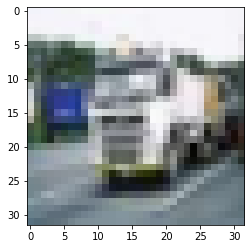

In [10]:
plt.imshow(training_images[1000])

In [11]:
training_images=training_images/training_images.max()

In [12]:
test_images=test_images/test_images.max()

In [23]:
model=tf.keras.Sequential()

In [24]:
model.add(tf.keras.layers.Conv2D(28,3,input_shape=(32,32,3),activation='relu'))

In [25]:
model.add(tf.keras.layers.MaxPool2D())

In [26]:
model.add(tf.keras.layers.Dropout(0.25,)) #we can also specify seed to choose the same weights each epoch

In [27]:
model.add(tf.keras.layers.Flatten())

In [28]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [29]:
model.add(tf.keras.layers.Dense(10))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 28)        784       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 28)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6300)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               806528    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [32]:
history=model.fit(training_images, training_labels, batch_size=64, epochs=10, validation_split=0.2 )

Epoch 1/10
625/625 [==============================] - 58s 91ms/step - loss: 1.5910 - accuracy: 0.4333 - val_loss: 1.3451 - val_accuracy: 0.5313
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 1.2869 - accuracy: 0.5433 - val_loss: 1.2908 - val_accuracy: 0.5440
Epoch 3/10
625/625 [==============================] - 50s 79ms/step - loss: 1.1847 - accuracy: 0.5816 - val_loss: 1.1874 - val_accuracy: 0.5863
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 1.1220 - accuracy: 0.6061 - val_loss: 1.1799 - val_accuracy: 0.5927
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 1.0737 - accuracy: 0.6215 - val_loss: 1.1332 - val_accuracy: 0.6074
Epoch 6/10
625/625 [==============================] - 46s 73ms/step - loss: 1.0282 - accuracy: 0.6361 - val_loss: 1.1390 - val_accuracy: 0.6081
Epoch 7/10
625/625 [==============================] - 45s 73ms/step - loss: 0.9903 - accuracy: 0.6524 - val_loss: 1.1154 - val_accuracy:

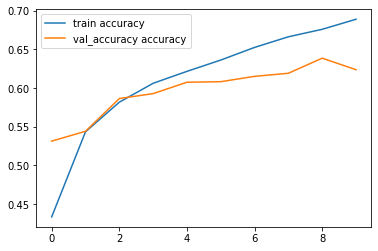

In [33]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy accuracy')
plt.legend()